# CASE STUDY: HOW DOES A BIKE SHARE NAVIGATE SUCCESS?

## THE CYCLISTIC BIKE SHARE ANALYSIS
### APRIL 2022
<img src="https://blogstudio.s3.amazonaws.com/thousand-helmets/2cc74c9c1f4d9441dcb1e0baab01229a.jpg" style="width: 600px;"/>

### <p style='text-align: right;'> BY OLALEKAN SAMSON OLUJOBI </p>

#### Problem Statement:

                LESS PROFITABILITY OF CASUAL BIKE RIDERS
                

#### Business Task: 

                CONVERTING CASUAL RIDERS INTO ANNUAL MEMBERS FOR INCREASED PROFITABILITY WITHOUT LOSING THE CUSTOMERS



# **INTRODUCTION**

##### Data Source: [Cyclistic's dataset from March 2021 to February 2022](https://divvy-tripdata.s3.amazonaws.com/index.html)

This is a public data that has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement) and data-privacy issues prohibits the use of riders' personally identifiable information.

##### Metadata: 

* ride_id: 16-character unique identifier for each ride (a combination of numbers and alphabets)
* rideable_type: type of bike; classic, docked, or electric
* started_at: date and time trip started
* ended_at: date and time trip ended
* start_station_name: name of trip's start station
* start_station_id: unique identifier for start station
* end_station_name: name of trip's end station
* end_station_id: unique identifier for end station
* start_lat: latitude of start station
* start_lng: longitude of start station
* end_lat: latitude of end station
* end_lng: longitude of end station
* member_casual: membership status; casual or member


# **PREPARATION AND PROCESSING**

#### With this dataset, we will be able to:

* Monitor the trends of Cyclistic bike-sharing within the period under review for members and casual riders
* Estimate the average trip time for riders
* Identify the most used start stations and end stations
* Compare the ratio of members to casual riders within the period

#### Limitations of this dataset include but no limited to:

* Fee for membership is not obtainable
* Membership registration date is not included
* It does not indicate when a casual member buys an annual membership within the period under review
* It does not include the charge for each casual bike trip

#### <u> Observations </u>

   1. Total number of rides within the review period is 5,667,986
   
   2. Start station names nor Start station Ids were not recorded for a total of 712,975 trips.
   
   3. End station names nor End station Ids was not recorded for a total of 761,817.
   
   4. Different Start Stations names and Ids were attributed to same Location (Latitude and Longitude), a record of 1,403 occurrences
   
   5. Different End Stations names and Ids were attributed to same Location (Latitude and Longitude), a record of 12,096 occurrences
   
   6. Recorded Trip Start and End times were the same for 508 rides while 145 rides had their End times earlier than the Start times

#### <u> Actions taken </u>
    
   1. None
   
   2. Start Latitudes and Longitudes for these trips were used to determine their Start station name and Id where the locations were attributed to only one Station name and Id and then updated in the analyzed dataset.
   Outstanding Start stations with missing names and ids were then recorded at 556,685 each
   
   3. End Latitudes and Longitudes for some of the trips were used to determine the End station name and Id and updated in the analyzed dataset       
   Outstanding End stations with missing names and ids were then recorded at 610,731 each while no end location at all was recorded for 4,617 trips
   
   4. None
   
   5. None
   
   6. None
   


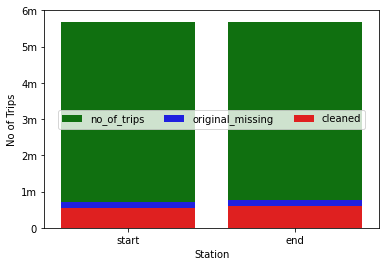

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


df= pd.DataFrame(dict(
no_of_trips = [5667986,5667986],
st_end = ['start','end'],
original = [712975, 761817],
cleaned = [556685, 610731]
))


bar1 = sns.barplot(x='st_end', y='no_of_trips', data=df, label='no_of_trips',color='green')
bar2 = sns.barplot(x='st_end', y='original', data=df, label='original_missing', color='blue')
bar3 = sns.barplot(x='st_end', y='cleaned', data=df, label='cleaned',color='red')
plt.legend(ncol=3, loc="center", frameon=True)
plt.xlabel('Station')
plt.ylabel('No of Trips')
plt.ylim(0, 6000000)
plt.yticks([0,1000000,2000000,3000000,4000000,5000000,6000000], ['0','1m','2m','3m','4m','5m','6m'])
plt.show()



#### Total trips with missing start and end station names before and after cleaning the data

#####

<img src="https://thumbs2.imgbox.com/6a/ae/s2JutOzs_t.jpg" style="width: 600px;"/>

#### <u> Assumptions </u>

   1. The 4,617 trips without identifiable End stations were ended by proxy (maybe through phone calls in exceptional cases and retrieved by a staff of cyclisist) and not at bike stations
   
   2. Daylight saving influences some of the recorded durations with negative values. 

###   
   
#### Tools adopted for use in this analysis were:

   * Excel Spreadsheet & SQL for data cleaning, integrity check, aggregation and manipulation
   * Python for further manipulation, analysis and Visualization
   * Power BI for visualization and final reporting



# **ANALYSIS**

1. Most trips lasted about 21mins

2. The maximum trip lasted for 38days, 20hrs 24mins by a Casual rider who took a 'docked bike' from the 'Michigan Ave & Lake St' station on the 5th of June, 2021 and docked it the at 'Malcolm X College Vaccination Site' station on the 13th of July, 2021.

3. The minimum ride duration lasted 0.016secs, this occured 936 times. 43 of these trips started and ended at different stations which seems impossible within a minute.(the start or end times must have been recorded in error)

4. The top 10 trips as per ride duration were all by Casual riders and were of rideable type: 'docked bike'

5. Average ride for trips by Members lasted about 13 minutes while Casual riders rode for an average of 32 minutes


6. Average ride duration during the days of the week are tabulated below with an indication that trips are taken for longer periods on weekends than on workdays

| Workday | Duration | Weekend | Duration |
| :-: | :-: | :-: | :-: | 
| Monday | 20.58mins | Saturday | 26.02mins|
| Tuesday | 18.22mins | Sunday | 27.75mins|
| Wednesday | 18.13mins |
| Thursday | 18.50mins |
| Friday | 20.80mins |

7. Average ride duration during the days of the week, recorded by membership status. Re-iterating the fact that Casual riders use the bike share service more on all days of the week and longer rides occur on weekends 

| Status | Weekday | Duration || Status| Weekday | Duration |
| :-: | :-: | :-: || :-: | :-: | :-: |
| Member | Monday | 13.05mins || Casual | Monday | 31.80mins |
| Member | Tuesday | 12.67mins || Casual | Tuesday | 27.83mins |
| Member | Wednesday | 12.65mins || Casual | Wednesday | 27.67mins |
| Member | Thursday | 12.67mins || Casual | Thursday | 27.83mins |
| Member | Friday | 13.22mins || Casual | Friday | 31.17mins |
| Member | Saturday | 15.08mins|| Casual | Saturday | 34.54mins|
| Member | Sunday | 15.48mins|| Casual | Sunday | 37.49mins|



### Bike Share comparison between Members and Casual Riders



<img src="https://thumbs2.imgbox.com/84/1e/kqCumsKA_t.jpg" style="width: 900px;"/>


#### Noticeable seasonal trend:
    
* Spring: March 1 to May 31 - The weather is warmer and often wetter, following the end of a Winter period. Bike rides began to spike at the end of this period

* Summer: June 1 to August 31 - In the summer, temperatures often increase and the dry roads allow for better ride experience. Cyclistic bike share rides peaked during this period

* Autumn (Fall): September 1 to November 30 - In the autumn, or fall, temperatures cool again and rides were noticed to drop sharply again towards the end of the season into Winter.

* Winter: December 1 to February - Winter often brings a chill. Some areas may experience snow or ice, while others see only cold rain. RIdes were at their lowest ranges in this season and may experience another spike in the coming Spring season.

#### Daily Trend:

* Weekends: Saturdays & Sundays - Causual riders tend to take more rides than members during these days.

* Weekdays: Mondays to Fridays - Members take more rides than casual riders during the week. 

Inference could be drawn from these that members most use of the bike share is for navigation to and/or from work



<img src="https://thumbs2.imgbox.com/a0/f0/p03EETp8_t.jpg" style="width: 900px;"/>

* Classic bikes seem to be the most preferrable to riders, followed by electric bikes, having docked bikes the least preferrable rideable type and rode only bike Casual riders

* 'Streeter Dr & Grand Ave' was the most used Start and End station by casual riders, 'Wabash Ave & Grand' and 'Dearborn St & Erie St' being the 10th most used Start and End stations respectively



# **RECOMMENDATIONS**

Based on available information:

1. Membership rides should be charged at a lesser rate to Casual rides (if not already implemented), with more discounts on weekends.

2. Physical Ads (bill boards and flyers) should be deployed to the top 10 start and end stations to create top of mind awareness for annual membership.

3. Incentives should be offered to members within their few months of membership

4. Docked bikes should be made a 'Members only' rideable type

5. Reward loyalty programmes should be run for members

6. Trip durations should be made available to casual riders at the end of each ride including a membership price comparison for the same trip

<img src="https://thumbs2.imgbox.com/c3/d2/VcV0bA5L_t.jpg" style="width: 1100px;"/>



[Click here](https://github.com/Implilekan/Implilekan/blob/master/Cyclistic.sql) to view the MS SQL Server queries used for this project